# Requirements and imports

In [1]:
%pip install -r requirements_metal.txt

Note: you may need to restart the kernel to use updated packages.


# Setting up the experiment

In [2]:
from experiment import Experiment

# ============================== Settings ==============================
seed = 42
exps = 'exps/experiments.json'
exp_idx = 0
dataset_h5 = "/Users/edoardoconti/Tesi/iclus/dataset.h5"
ds_map_pkl = "/Users/edoardoconti/Tesi/iclus/hdf5_frame_index_map.pkl"
ds_split_pkl = "/Users/edoardoconti/Tesi/iclus/hospitals-patients-dict.pkl"
results_dir = 'results/'

# ============================= Experiment =============================
experiment = Experiment(exps, dataset_h5, ds_map_pkl, ds_split_pkl, results_dir, random_state=seed)
experiment.build()
# load the experiment settings giving the experiment ID
exp_name = experiment.load_exp_settings(exp_idx)

GPU acceleration available.

277 videos (58924 frames) loaded from cached data.

## Dataset splitting

In [3]:
experiment.split_dataset()

[dataset] dataset split: train=35795(61%), val=11733(20%), test=11396(19%)
[dataset] dataset reduction: 0% (train=178, val=58, test=56)


In [4]:
experiment.compute_class_weight()

[experiment] class weights:  {0: 0.7807017543859649, 1: 1.0853658536585367, 2: 0.6846153846153846, 3: 2.966666666666667}


### Plot dataset splitting charts

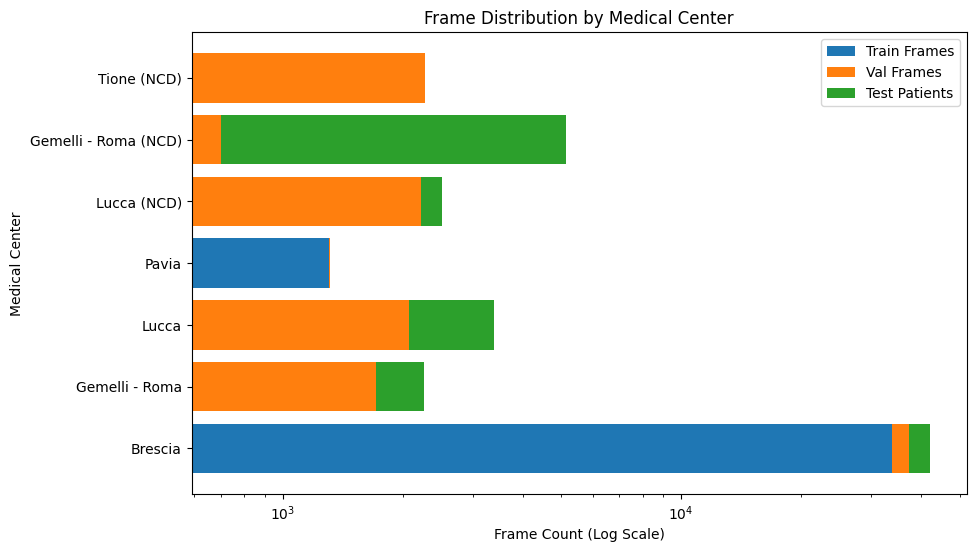

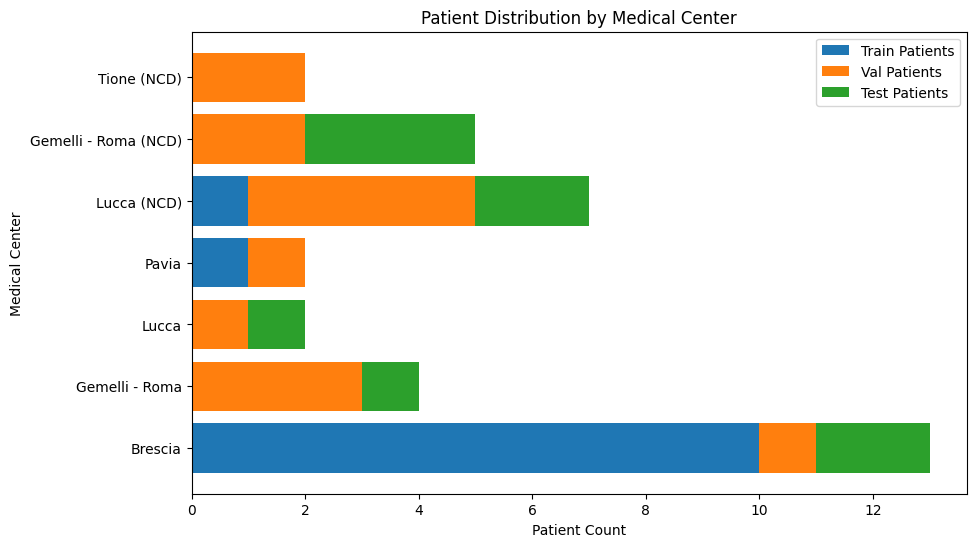

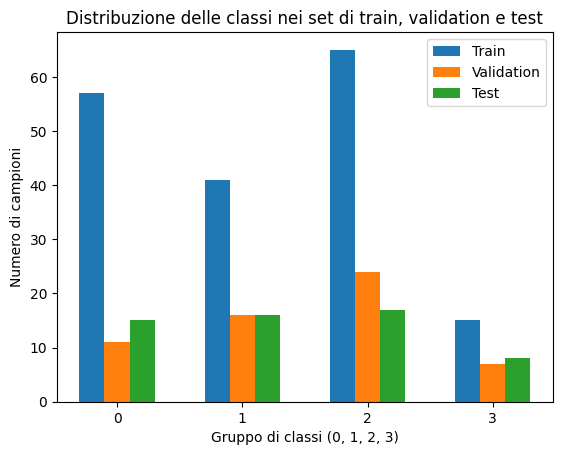

In [18]:
experiment.generate_split_charts(show=True, save=True)

### Generate train, val and test sets

In [22]:
experiment.generate_sets()

# Neural Network Model

In [23]:
model = experiment.nn_model_build()

[experiment] 'resnet18' neural network built with:
[experiment]	dropout -> 0



In [24]:
experiment.nn_model_compile(model, summary=True)

[experiment] neural network model compiled with:
[experiment]	loss -> CCE
[experiment]	optimizer -> SDG
[experiment]	learning rate -> 0.01

Model: "resnet18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_20 (Conv2D)          (None, 112, 112, 64)         9472      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_17 (Ba  (None, 112, 112, 64)         256       ['conv2d_20[0][0]']           
 tchNormalization)                                                                                
                                                  

 batch_normalization_20 (Ba  (None, 56, 56, 64)           256       ['conv2d_23[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_21 (Activation)  (None, 56, 56, 64)           0         ['batch_normalization_20[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_24 (Conv2D)          (None, 56, 56, 64)           36928     ['activation_21[0][0]']       
                                                                                                  
 batch_normalization_21 (Ba  (None, 56, 56, 64)           256       ['conv2d_24[0][0]']           
 tchNormalization)                                                                                
          

# Training Neural Network

In [25]:
history = experiment.nn_model_train(model, gradcam_freq=1, gradcam_show=True)

[experiment] last model's convolutional layer extracted: conv2d_39 (will be used by Grad-CAM)



2023-11-05 23:03:27.763288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - ETA: 0s - loss: 6.3532 - ccr: 0.2011 - mae: 1.2609 - ms: 0.0000e+00 - rmse: 1.5204 - acc_1off: 0.6685
Epoch 1: val_loss improved from inf to 1038.66968, saving model to weights/exp_resnet18_8_1_0_CCE_SDG_0.01_1e-06_0.9
23/23 [==============================] - 33s 1s/step - loss: 6.3532 - ccr: 0.2011 - mae: 1.2609 - ms: 0.0000e+00 - rmse: 1.5204 - acc_1off: 0.6685 - val_loss: 1038.6697 - val_ccr: 0.2969 - val_mae: 0.8125 - val_ms: 0.0000e+00 - val_rmse: 1.0013 - val_acc_1off: 0.8906


### Plot training graphs

In [ ]:
experiment.nn_train_graphs(history)

# Evaluate

In [ ]:
experiment.nn_model_evaluate(model)